# Compromiso sesgo-varianza (bias-variance tradeoff)

En el aprendizaje automático, el **sesgo** y la **varianza** son dos fuentes de error que afectan la capacidad de un modelo para hacer predicciones precisas. Comprender la relación entre estos factores es clave para construir modelos de **aprendizaje supervisado** efectivos.

#### **¿Qué es el Sesgo?**
El **sesgo** mide qué tan lejos está un modelo de capturar la verdadera relación entre las variables de entrada $X$ y la salida $y$. Se considera que un modelo tiene **alto sesgo** cuando hace suposiciones demasiado simplificadas sobre los datos.

- **Ejemplo:** Usar una **línea recta** para modelar datos que en realidad tienen una relación **curva**.
- **Problema:** El modelo subestima la complejidad de los datos y no captura patrones importantes.
- **Consecuencia:** Alto error en entrenamiento y validación (subajuste).

Si la función real es $ f(x) $, un modelo con alto sesgo tendrá predicciones $ \hat{f}(x) $ con errores sistemáticos:

$$
\text{Sesgo}^2 = (E[\hat{f}(x)] - f(x))^2
$$

---
#### **¿Qué es la Varianza?**
La **varianza** mide cuánto varían las predicciones del modelo cuando se entrena con diferentes subconjuntos de datos. Un modelo con **alta varianza** es muy sensible a los datos de entrenamiento y captura demasiado detalle.

- **Ejemplo:** Un modelo muy complejo que memoriza los datos de entrenamiento en lugar de aprender patrones generales.
- **Problema:** Generaliza mal a datos nuevos.
- **Consecuencia:** Bajo error en entrenamiento, pero alto error en validación (sobreajuste).

La varianza mide la dispersión de las predicciones del modelo:

$$
\text{Varianza} = E[(\hat{f}(x) - E[\hat{f}(x)])^2]
$$

#### **La Compensación Sesgo-Varianza (Bias-Variance Tradeoff)**
El objetivo del aprendizaje automático es encontrar un equilibrio entre **sesgo** y **varianza**. No queremos un modelo **demasiado simple** que **subajuste** (alto sesgo) ni un modelo **demasiado complejo** que **memorice los datos** y **sobreajuste** (alta varianza).

- Modelos simples: **Alto sesgo, baja varianza** (Ejemplo: Regresión lineal en datos no lineales).
- Modelos complejos: **Bajo sesgo, alta varianza** (Ejemplo: Red neuronal con muchas capas sin regularización).
- **Punto ideal:** Donde el error total es mínimo.

El **error total** de un modelo se puede descomponer como:

$$
\text{Error Total} = \text{Sesgo}^2 + \text{Varianza} + \text{Ruido}
$$

Donde el **ruido** es un error irreducible inherente a los datos.

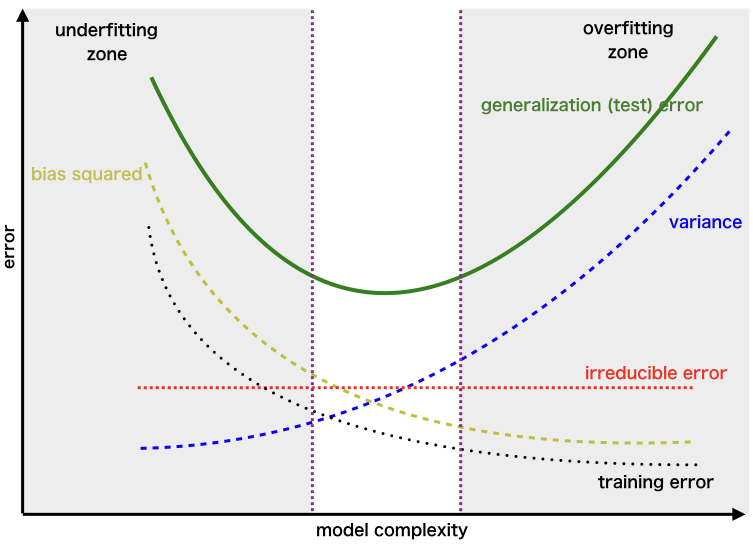

# **Ejemplo**

Para entender el **compromiso sesgo-varianza** en un **ejemplo práctico**, imaginemos que queremos predecir el **precio de una casa** basándonos en su tamaño (en metros cuadrados).

Supongamos que tenemos un conjunto de datos donde conocemos el tamaño de varias casas y sus respectivos precios. Queremos construir un modelo que relacione el tamaño de la casa $X$ con el precio $Y$.

**Escenarios posibles al entrenar un modelo:**
1. Un modelo **muy simple** (alta regularización) que solo usa una línea recta
$$Y = aX + b$$
2. Un modelo **balanceado** que usa una función polinómica de grado 2 $$Y = aX^2 + bX + c$$
3. Un modelo **demasiado complejo** (sin regularización) que usa una función polinómica de grado alto $$Y = aX^9 + bX^8 + ...$$

**Meta:** Encontrar un modelo que generalice bien sin caer en el sobreajuste (**overfitting**) ni en el subajuste (**underfitting**)

---

#### **Escenario 1: Modelo de Alto Sesgo (Regresión Lineal)**
Supongamos que usamos **una línea recta** para predecir el precio. La ecuación del modelo sería:

$$
\hat{Y} = aX + b
$$

- El modelo es **demasiado simple** y no captura la relación real entre el tamaño y el precio.
- Hay un **alto error en entrenamiento y validación** porque la relación entre el tamaño y el precio no es estrictamente lineal.
- **Ejemplo visual:** El modelo predice que **todas las casas grandes tienen precios similares**, lo cual no es realista.

El modelo sufre de **subajuste** (underfitting) y tiene **alto sesgo**.

---

#### **Escenario 2: Modelo Balanceado (Regresión Cuadrática)**
En este caso, usamos una función de segundo grado para modelar la relación:

$$
\hat{Y} = aX^2 + bX + c
$$
**Características:**
- El modelo es lo **suficientemente flexible** para capturar la relación real entre el tamaño y el precio.
- Tiene **bajo sesgo y baja varianza**, lo que lo hace ideal para generalizar bien.
- **Ejemplo visual:** El modelo predice que **las casas más grandes pueden tener precios más altos**, pero sin exagerar.

 Este modelo tiene el **mejor compromiso** entre sesgo y varianza.

---

#### **Escenario 3: Modelo de Alta Varianza (Regresión Polinómica de Grado 9)**
Ahora usamos un polinomio de grado 9:

$$
\hat{Y} = aX^9 + bX^8 + ... + iX + j
$$

**Problema:**
- El modelo es **demasiado flexible**, ajustándose **exactamente** a los datos de entrenamiento.
- **Ejemplo visual:** Si una casa específica en el conjunto de entrenamiento tenía un precio inusualmente bajo, el modelo podría hacer una predicción **extremadamente baja para casas similares**.
- **Error bajo en entrenamiento, pero alto en validación** porque el modelo **memoriza** los datos y no generaliza bien.

El modelo sufre de **sobreajuste** (overfitting) y tiene **alta varianza**.

---


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.16MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 243kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



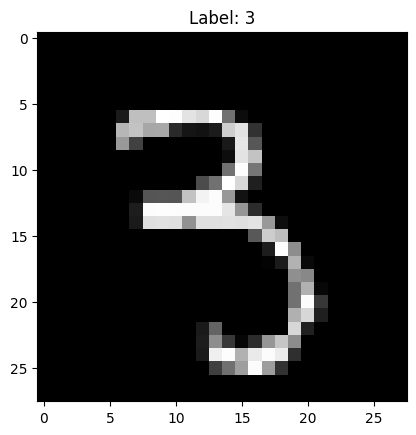

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Transformaciones: Convertir imágenes a tensores y normalizar
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Cargar dataset MNIST
batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# Verificamos un ejemplo de imagen
images, labels = next(iter(trainloader))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.show()

In [ ]:
# Modelo Simple (Alto Sesgo)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 2)  # Pequeña capa oculta
        self.fc2 = nn.Linear(2, 10)  # Capa de salida para 10 dígitos

    def forward(self, x):
        x = x.view(-1, 28*28)  # Aplanar imagen de 28x28 a un vector
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# CNN Compleja (Alta Varianza - Sobreajuste)
class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Más filtros
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Aplanamos
        #print(f"Tamaño de x después de la convolución: {x.size()}")
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Crear instancias de los modelos
simple_model = SimpleNN()
complex_model = ComplexCNN()

In [ ]:
# Definir el dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

def train_and_evaluate(model, optimizer, criterion, trainloader, testloader, epochs=15):
    model.to(device)  # Mover el modelo a GPU

    train_losses = []  # Lista para almacenar la pérdida de entrenamiento
    test_losses = []   # Lista para almacenar la pérdida de prueba
    train_accuracies = []  # Lista para almacenar la precisión en entrenamiento
    test_accuracies = []  # Lista para almacenar la precisión en prueba

    for epoch in range(epochs):
        # ---- ENTRENAMIENTO ----
        model.train()
        train_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a GPU

            optimizer.zero_grad()
            outputs = model(images)  # El modelo ya está en GPU
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            # Calcular precisión en entrenamiento
            _, predicted = outputs.max(1)  # Obtener la clase con mayor probabilidad
            correct_train += predicted.eq(labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(train_loss / len(trainloader))
        train_accuracies.append(100. * correct_train / total_train)

        # ---- EVALUACIÓN ----
        model.eval()
        test_loss = 0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)  # Mover datos a GPU

                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                # Calcular precisión en prueba
                _, predicted = outputs.max(1)
                correct_test += predicted.eq(labels).sum().item()
                total_test += labels.size(0)

        test_losses.append(test_loss / len(testloader))
        test_accuracies.append(100. * correct_test / total_test)

        print(f"Época {epoch+1}/{epochs} - "
              f"Pérdida Train: {train_losses[-1]:.4f}, Acc: {train_accuracies[-1]:.2f}% - "
              f"Pérdida Test: {test_losses[-1]:.4f}, Acc: {test_accuracies[-1]:.2f}%")

    return train_losses, test_losses, train_accuracies, test_accuracies


Usando dispositivo: cuda


In [ ]:
# Definir función de pérdida y optimizadores
criterion = nn.CrossEntropyLoss()
optimizer_simple = optim.Adam(simple_model.parameters(), lr=0.001)
optimizer_complex = optim.Adam(complex_model.parameters(), lr=0.0001)

In [ ]:

# Entrenamos el Modelo Simple
print("\nEntrenando el Modelo Simple...")
simple_train_losses, simple_test_losses,simple_train_accuracies, simple_test_accuracies = train_and_evaluate(simple_model, optimizer_simple, criterion, trainloader, testloader, epochs=50)




Entrenando el Modelo Simple...
Época 1/50 - Pérdida Train: 1.6801, Acc: 38.12% - Pérdida Test: 1.4554, Acc: 40.99%
Época 2/50 - Pérdida Train: 1.3782, Acc: 46.01% - Pérdida Test: 1.3150, Acc: 49.74%
Época 3/50 - Pérdida Train: 1.2754, Acc: 51.90% - Pérdida Test: 1.2297, Acc: 53.80%
Época 4/50 - Pérdida Train: 1.2063, Acc: 54.99% - Pérdida Test: 1.1676, Acc: 56.24%
Época 5/50 - Pérdida Train: 1.1577, Acc: 57.97% - Pérdida Test: 1.1193, Acc: 60.12%
Época 6/50 - Pérdida Train: 1.1168, Acc: 61.39% - Pérdida Test: 1.0860, Acc: 62.45%
Época 7/50 - Pérdida Train: 1.0871, Acc: 62.82% - Pérdida Test: 1.0664, Acc: 63.69%
Época 8/50 - Pérdida Train: 1.0679, Acc: 63.54% - Pérdida Test: 1.0486, Acc: 64.16%
Época 9/50 - Pérdida Train: 1.0540, Acc: 64.09% - Pérdida Test: 1.0404, Acc: 64.67%
Época 10/50 - Pérdida Train: 1.0429, Acc: 64.69% - Pérdida Test: 1.0331, Acc: 65.21%
Época 11/50 - Pérdida Train: 1.0339, Acc: 65.00% - Pérdida Test: 1.0255, Acc: 65.70%
Época 12/50 - Pérdida Train: 1.0270, Acc: 

In [ ]:
# Entrenamos el Modelo Complejo
print("\nEntrenando el Modelo Complejo...")
complex_train_losses, complex_test_losses, complex_train_accuracies, complex_test_accuracies = train_and_evaluate(complex_model, optimizer_complex, criterion, trainloader, testloader, epochs=50)



Entrenando el Modelo Complejo...
Época 1/50 - Pérdida Train: 0.4920, Acc: 85.56% - Pérdida Test: 0.1400, Acc: 95.60%
Época 2/50 - Pérdida Train: 0.1177, Acc: 96.34% - Pérdida Test: 0.0819, Acc: 97.47%
Época 3/50 - Pérdida Train: 0.0815, Acc: 97.46% - Pérdida Test: 0.0566, Acc: 98.25%
Época 4/50 - Pérdida Train: 0.0630, Acc: 98.02% - Pérdida Test: 0.0451, Acc: 98.60%
Época 5/50 - Pérdida Train: 0.0523, Acc: 98.35% - Pérdida Test: 0.0421, Acc: 98.67%
Época 6/50 - Pérdida Train: 0.0445, Acc: 98.61% - Pérdida Test: 0.0414, Acc: 98.71%
Época 7/50 - Pérdida Train: 0.0373, Acc: 98.84% - Pérdida Test: 0.0283, Acc: 99.08%
Época 8/50 - Pérdida Train: 0.0325, Acc: 99.00% - Pérdida Test: 0.0377, Acc: 98.74%
Época 9/50 - Pérdida Train: 0.0292, Acc: 99.07% - Pérdida Test: 0.0263, Acc: 99.12%
Época 10/50 - Pérdida Train: 0.0252, Acc: 99.20% - Pérdida Test: 0.0330, Acc: 98.78%
Época 11/50 - Pérdida Train: 0.0233, Acc: 99.23% - Pérdida Test: 0.0258, Acc: 99.17%
Época 12/50 - Pérdida Train: 0.0197, Acc

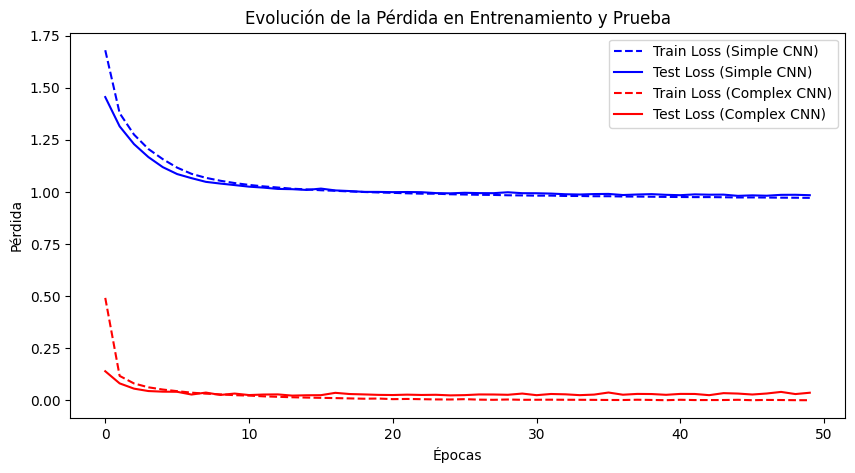

In [ ]:
plt.figure(figsize=(10,5))

# Pérdidas del modelo simple
plt.plot(simple_train_losses, label='Train Loss (Simple CNN)', linestyle='dashed', color='blue')
plt.plot(simple_test_losses, label='Test Loss (Simple CNN)', linestyle='solid', color='blue')

# Pérdidas del modelo complejo
plt.plot(complex_train_losses, label='Train Loss (Complex CNN)', linestyle='dashed', color='red')
plt.plot(complex_test_losses, label='Test Loss (Complex CNN)', linestyle='solid', color='red')

plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la Pérdida en Entrenamiento y Prueba")
plt.legend()
plt.show()
